In [2]:
import valenspy as vp
from valenspy.preprocessing_tasks.regrid import remap_cdo
from valenspy._regions import sel_region
from dask.diagnostics import ProgressBar
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
from datatree import DataTree

# Load the data
Using a datatree to organize and easly handle multiple experiments (datasets).

In [3]:
data_dict = {}

## Observartion - ERA-5


In [4]:
manager = vp.InputManager(machine="hortense")
ds_ref = manager.load_data("ERA5",["tas","pr"], period=2006, freq="hourly",region="europe")
data_dict["obs/ERA5"] = ds_ref
ds_ref


File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/europe/hourly/total_precipitation/era5-hourly-europe-total_precipitation-2006.nc
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/europe/hourly/2m_temperature/era5-hourly-europe-2m_temperature-2006.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas', 'pr']


<xarray.Dataset> Size: 7GB
Dimensions:  (lon: 289, lat: 163, time: 8760)
Coordinates:
  * lon      (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * lat      (lat) float32 652B 33.0 33.25 33.5 33.75 ... 72.75 73.0 73.25 73.5
  * time     (time) datetime64[ns] 70kB 2006-01-01 ... 2006-12-31T23:00:00
Data variables:
    tas      (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 51, 99), meta=np.ndarray>
    pr       (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 51, 99), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-19 04:37:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    period:       2006
    freq:         hourly
    region:       europe
    dataset:      ERA5

## ALARO_SFX data
- ALARO_AERO_GHGs: Contains the GHG change and AEROSOL change
- ALARO_GHG: Contains the only the GHG change
- ALARO_original: Contains the original model data (no changes)
- ALARO_wout: Contains the wouts long runs - same as original but spinup already done

In [5]:
experiments = {
    "mod/ALARO_AERO_GHGs": Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc44757_Nicolas/run_ALARO_sfx/out/netcdf/6M_CObeII_ERA5_25_12_ALARO_SFX_EUROCORDEX_20240802/output/"),
    "mod/ALARO_GHGs" : Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc44757_Nicolas/run_ALARO_sfx/out/netcdf/6M_ERA5_25_12_ALARO_EUROCORDEX_GHGs_20240802b/output/"),
    "mod/ALARO_original" : Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc44757_Nicolas/run_ALARO_sfx/out/netcdf/EXAMPLE_ERA5_25_12_ALARO_EUROCORDEX_20240802/output/"),
    "mod/ALARO_wout" : Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/CORDEXbeII/run_ALARO_sfx/out/netcdf/wout_12km_runs")
}
ic = vp.inputconverter.INPUT_CONVERTORS["ALARO_K"]

for exp, path in experiments.items():
    print(f"Loading data for {exp}")
    files = list(path.glob('**/*.nc'))
    ds = ic.convert_input(files)
    data_dict[exp] = ds

Loading data for mod/ALARO_AERO_GHGs
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
20.69% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas', 'ts', 'uas', 'vas', 'sfcWind', 'pr']
Unknown to ValEnsPy: ['longitude_bnds', 'latitude_bnds', 'Lambert_Conformal', 'cloudfraction', 'ground_heat_flux', 'latent_heat_flux', 'latent_heat_flux_transp', 'net_radiation', 'rain_convective', 'rain_stratiform', 'relativehumidity_2m_atm', 'relativehumidity_2m_sfx', 'roughness_length_momentum', 'sensible_heat_flux', 'snow_convective', 'snow_stratiform', 'soil_moisture_mid', 'soil_moisture_top', 'soil_temperature_bot', 'soil_temperature_top', 'specifichumidity_2m_atm', 'surface_pressure', 'temperature_2m_sfx']
Loading data for mod/ALARO_GHGs
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
20.69% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas', 'ts', 'uas', 'vas', 'sfcWind', 'pr']
Unknown to Val

## The final DataTree

In [6]:
dt = DataTree.from_dict(data_dict)
dt

DataTree('None', parent=None)
├── DataTree('obs')
│   └── DataTree('ERA5')
│           Dimensions:  (lon: 289, lat: 163, time: 8760)
│           Coordinates:
│             * lon      (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
│             * lat      (lat) float32 652B 33.0 33.25 33.5 33.75 ... 72.75 73.0 73.25 73.5
│             * time     (time) datetime64[ns] 70kB 2006-01-01 ... 2006-12-31T23:00:00
│           Data variables:
│               tas      (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 51, 99), meta=np.ndarray>
│               pr       (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 51, 99), meta=np.ndarray>
│           Attributes:
│               Conventions:  CF-1.6
│               history:      2020-02-19 04:37:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
│               period:       2006
│               freq:         hourly
│               region:       europe
│               dataset:      ERA5
└── DataTree('mod')
    ├── DataTree('ALARO_AERO_GHGs')
    │       Dimensions:                    (time: 4416, y: 499, x: 499, x_2: 4)
    │       Coordinates:
    │         * time                       (time) datetime64[ns] 35kB 2006-03-01T01:00:00...
    │           longitude                  (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
    │           latitude                   (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
    │         * x                          (x) float64 4kB -3.112e+06 -3.1e+06 ... 3.112e+06
    │         * y                          (y) float64 4kB 2.986e+06 2.999e+06 ... 9.211e+06
    │       Dimensions without coordinates: x_2
    │       Data variables: (12/29)
    │           longitude_bnds             (time, y, x, x_2) float64 35GB dask.array<chunksize=(24, 499, 499, 4), meta=np.ndarray>
    │           latitude_bnds              (time, y, x, x_2) float64 35GB dask.array<chunksize=(24, 499, 499, 4), meta=np.ndarray>
    │           Lambert_Conformal          (time) |S1 4kB b'' b'' b'' b'' ... b'' b'' b''
    │           cloudfraction              (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           ground_heat_flux           (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           latent_heat_flux           (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           ...                         ...
    │           temperature_2m_sfx         (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           ts                         (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           uas                        (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           vas                        (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           sfcWind                    (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │           pr                         (time, y, x) float32 4GB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    │       Attributes: (12/23)
    │           CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    │           Conventions:  CF-1.6
    │           basedate:     2006-03-01
    │           validate:     2006-03-01 01:00:00
    │           leadtime:     1
    │           timestep:     300
    │           ...           ...
    │           ey:           13
    │           center_lon:   9.9
    │           center_lat:   49
    │           history:      Mon Aug 05 09:58:18 2024: cdo mergetime /dodrio/scratch/pro...
    │           CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
    │           dataset:      ALARO-SFX_K
    ├── DataTree('ALARO_GHGs')
    │       Dimensions:                    (time: 4416, y: 499, x: 499, x_

# Data preperation
Preparing the loaded datasets for the diagnostics
- Select variables
- Select time period
- Select region
- Do regridding if needed

In [7]:
def preprocessing(ds, ref=False):
    ds = ds.sel(time=slice("2006-03-01","2006-04-30")) #Select time period
    ds = ds[["tas","pr"]] #Select variables
    #ds = ds.resample(time="D").mean() #Resample to daily values
    if not ref: #Regrid to reference grid
        gridfile= "/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/europe/daily/2m_temperature/era5-daily-europe-2m_temperature-2006.nc"
        ds = remap_cdo(gridfile, ds, "bil") 
    
    region = 'europe'
    ds = sel_region(ds, region=region) #Select region
    return ds

In [8]:
with ProgressBar():
    dt["mod"] = dt["mod"].map_over_subtree(preprocessing)
    dt["obs"] = dt["obs"].map_over_subtree(preprocessing, ref=True)

[########################################] | 100% Completed | 254.94 s
[########################################] | 100% Completed | 427.90 s
[########################################] | 100% Completed | 406.64 s
[########################################] | 100% Completed | 314.19 s


# Diagnostics
A quick comparison between the data

### Model2Ref



In [9]:
SpatialBias_ens = vp.Ensemble2Ref.from_model2ref(vp.diagnostic.SpatialBias)

with ProgressBar():
    dt_spatial_bias = SpatialBias_ens.apply(dt["mod"], dt["obs/ERA5"].ds)

/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/cartopy/m

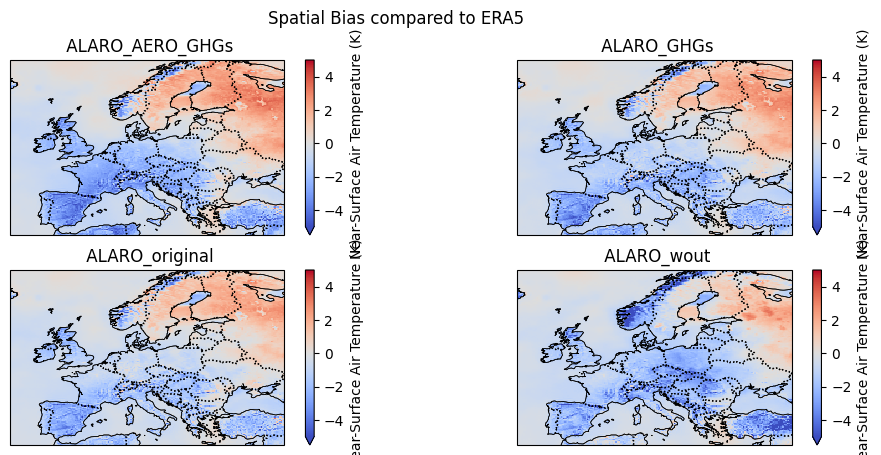

In [10]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(2,2, figsize=(12,5), subplot_kw={"projection":ccrs.PlateCarree()})
SpatialBias_ens.plot(dt_spatial_bias, axes=ax, variable="tas", facetted=True, vmin=-5, vmax=5)
#Fig title
fig.suptitle("Spatial Bias compared to ERA5")
plt.show()

### Model2Self
Some diagnostics to compare the model to itself
### Diurnal cycle

In [11]:
DiurnalCycle_ens = vp.Ensemble2Self.from_model2self(vp.diagnostic.DiurnalCycle)
dt_diurnal_cycle = DiurnalCycle_ens.apply(dt)

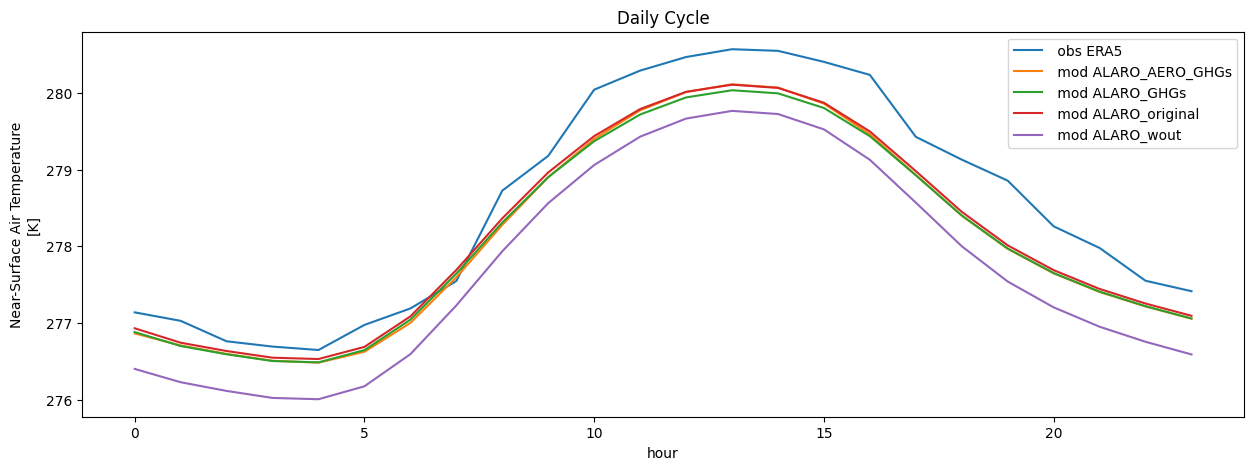

In [12]:
fig,ax = plt.subplots(1,1, figsize=(15,5))
DiurnalCycle_ens.plot(dt_diurnal_cycle, facetted=False, variable="tas", axes=ax)
plt.legend()

### Time series

In [14]:
from valenspy.diagnostic import TimeSeriesSpatialMean
TimeSeriesSpatialMean_ens = vp.Ensemble2Self.from_model2self(TimeSeriesSpatialMean)

dt_ts = TimeSeriesSpatialMean_ens.apply(dt)

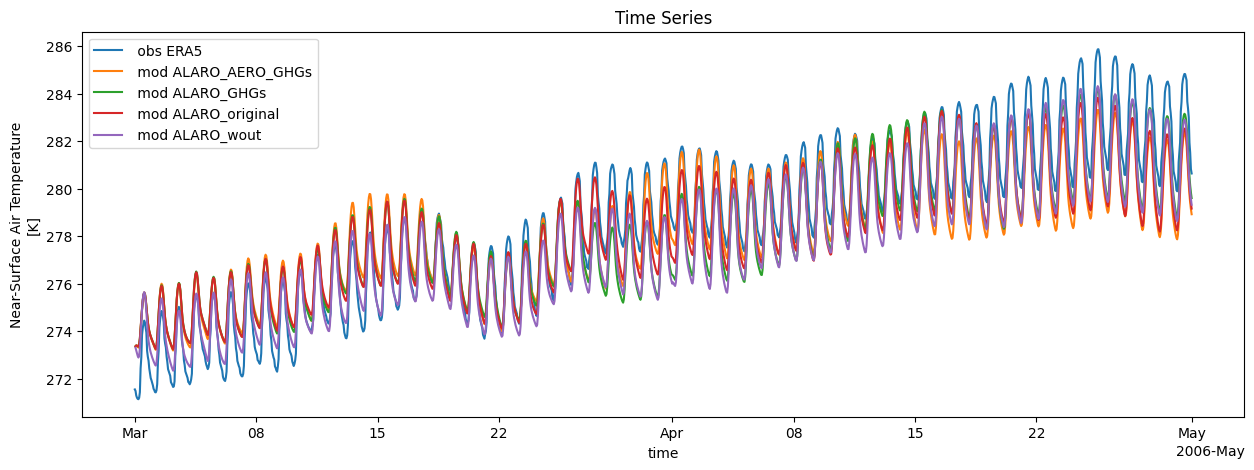

In [15]:

fig,ax = plt.subplots(1,1, figsize=(15,5))
TimeSeriesSpatialMean_ens.plot(dt_ts, variable="tas", axes=ax, facetted=False)
plt.legend()
plt.show()

# TODOs
- Plot time series of soil_moisture and soil_temperature - temporal spinup (and dubbel check the monthly restarts)
- Evaluate the precipitation
- Do a longer evaluation (comparing ERA-5 vs ALARO) - possibly extend wout conversion data.